<a href="https://colab.research.google.com/github/capitallatera/Case-Study/blob/master/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Importing Libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import math
%matplotlib inline

In [90]:
# Reading Dataset
titanic_dataset=pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [91]:
titanic_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [92]:
titanic_dataset.shape

(891, 12)

- Analyse dataset
- How to get total number of passengers

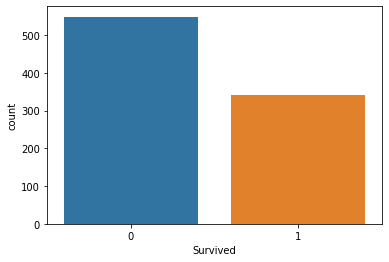

In [93]:
sns.countplot('Survived',data=titanic_dataset)

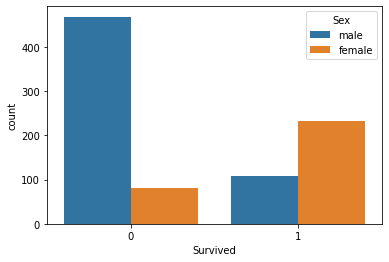

In [94]:
sns.countplot('Survived',hue='Sex',data=titanic_dataset)

In [95]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

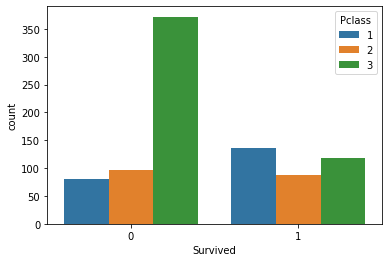

In [96]:
sns.countplot('Survived',hue='Pclass',data=titanic_dataset)

In [97]:
titanic_dataset.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [98]:
# titanic_dataset.shape

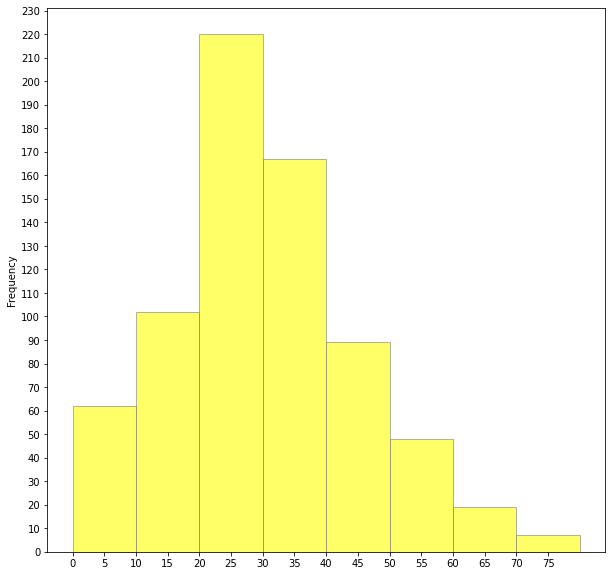

In [99]:
from matplotlib import pyplot as plt
plt.xticks(range(0,80,5))
plt.yticks(range(0,300,10))
titanic_dataset["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80],figsize=(10,10),edgecolor="gray",facecolor='yellow',alpha=0.6)

How many older people are on titanic ship

In [100]:
len(titanic_dataset[titanic_dataset['Age']>60])

22

How many people are in the age group of 25 yrs to 45 yrs ?

In [101]:
titanic_dataset[(titanic_dataset["Age"]>=25) & (titanic_dataset["Age"]<=45)].shape[0]

333

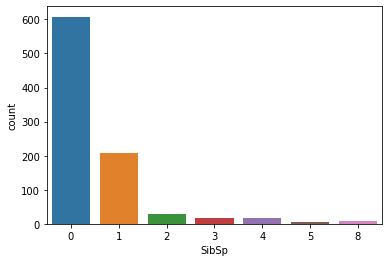

In [102]:
sns.countplot('SibSp',data=titanic_dataset)

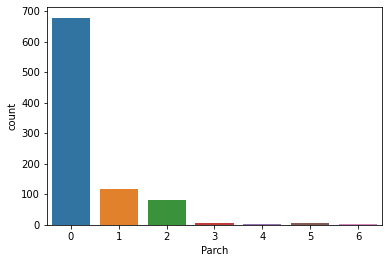

In [103]:
sns.countplot("Parch",data=titanic_dataset)

Data Wrangling
- Is cleaning required
- Imputation

What percentage of Null values are present in each column

In [104]:
(titanic_dataset.isna().sum()/titanic_dataset.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Remove cabin column as it has a lot of missing values ~77%

In [105]:
titanic_dataset.drop('Cabin',axis=1,inplace=True)

Fillna in Age column

In [106]:
titanic_dataset["Age"]=titanic_dataset["Age"].fillna(titanic_dataset["Age"].median())

In [107]:
titanic_dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [108]:
titanic_dataset["Embarked"].mode()[0]

'S'

In [109]:
titanic_dataset["Embarked"]=titanic_dataset["Embarked"].fillna(titanic_dataset["Embarked"].mode()[0])

In [110]:
titanic_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [111]:
## Cleaning is done

EDA Box Plot

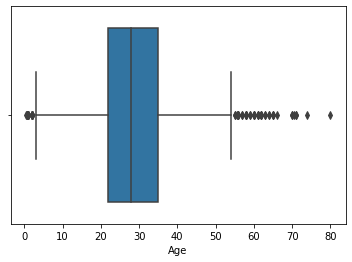

In [112]:
sns.boxplot(titanic_dataset["Age"],data=titanic_dataset)

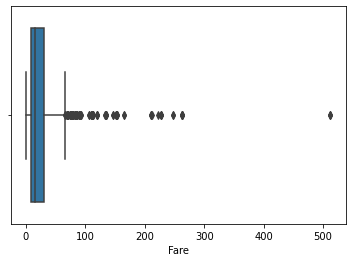

In [113]:
sns.boxplot(titanic_dataset["Fare"],data=titanic_dataset)

Pending
- Removing Outlier
- Removing Duplicate

In [114]:
titanic_dataset.duplicated().sum()

0

In [115]:
sex=pd.get_dummies(titanic_dataset["Sex"])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [116]:
embark=pd.get_dummies(titanic_dataset["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [117]:
pcl=pd.get_dummies(titanic_dataset["Pclass"])
pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [118]:
titanic_dataset=pd.concat([titanic_dataset,sex,embark,pcl],axis=1)

In [119]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [120]:
titanic_dataset.drop(["Ticket","PassengerId","Name","Sex","Pclass","Embarked"],axis=1,inplace=True)

In [121]:
titanic_dataset.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [122]:
titanic_dataset.to_csv("clean_titanic.csv")

Test train split

In [123]:
X=titanic_dataset.drop(["Survived"],axis=1)
y=titanic_dataset["Survived"]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=444)

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
model=LogisticRegression()

In [128]:
X_train.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
222,51.0,0,0,8.050,0,1,0,0,1,0,0,1
747,30.0,0,0,13.000,1,0,0,0,1,0,1,0
700,18.0,1,0,227.525,1,0,1,0,0,1,0,0
312,26.0,1,1,26.000,1,0,0,0,1,0,1,0
56,21.0,0,0,10.500,1,0,0,0,1,0,1,0


In [129]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
predictions=model.predict(X_test)

In [131]:
from sklearn.metrics import classification_report

In [132]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.77      0.74      0.75       101

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [133]:
y_test.value_counts()

0    167
1    101
Name: Survived, dtype: int64

In [134]:
from collections import Counter
Counter(predictions)

Counter({0: 170, 1: 98})

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(y_test,predictions)

array([[144,  23],
       [ 26,  75]])

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
accuracy_score(y_test,predictions)

0.8171641791044776

In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=444)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
accuracy_score(y_test,predictions)


0.8208955223880597

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=444)

In [142]:
X_train_std=scaler.fit_transform(X_train)

In [143]:
model.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
X_test_std=scaler.transform(X_test)

In [145]:
predictions=model.predict(X_test)
accuracy_score(y_test,predictions)

0.6828358208955224

In [146]:
predictions=model.predict(X_test_std)
accuracy_score(y_test,predictions)

0.8208955223880597

In [147]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [148]:
X.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [149]:
X=X.drop("SibSp",axis=1)

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=444)

In [151]:
X_train_std=scaler.fit_transform(X_train)

In [152]:
model.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
X_test_std=scaler.transform(X_test)

In [154]:
predictions=model.predict(X_test)
accuracy_score(y_test,predictions)

0.6492537313432836

In [155]:
predictions=model.predict(X_test_std)
accuracy_score(y_test,predictions)

0.8097014925373134